<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Basic%20Python%20Analysis%20(Segmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment Day 7: Basic Segmentation Based On Total Quantity and AOV

Silakan gunakan database dan SQL script yang telah disiapkan dengan menjalankan cells di bawah ini. Lakukan modifikasi code sesuai dengan kebutuhan soal, yaitu:


Bagian code yang harus dilengkapi akan ditandai dengan: /* isilah bagian ini */ 

1. Jalankan cells di bawah ini hingga table berhasil dibuat dan seluruh data berhasil dimasukkan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Setting up SQL and Database
import sqlite3
conn = sqlite3.connect('Northwind_lite.db')
c = conn.cursor()
from google.colab import drive
import pandas as pd

In [ ]:
#Create table customers
conn.execute('''DROP TABLE IF EXISTS [Customers];''')
conn.execute('''
  CREATE TABLE [Customers]
  (      [CustomerID] TEXT,
        [CompanyName] TEXT,
        [ContactName] TEXT,
        [ContactTitle] TEXT,
        [Address] TEXT,
        [City] TEXT,
        [Region] TEXT,
        [PostalCode] TEXT,
        [Country] TEXT,
        [Phone] TEXT,
        [Fax] TEXT,
        PRIMARY KEY (`CustomerID`)
  );''')
 
conn.commit()
 
print("Customers table created");

Customers table created


In [ ]:
#Create table Orders
conn.execute('''DROP TABLE IF EXISTS [Orders]''')
conn.execute('''
  CREATE TABLE [Orders](
    [OrderID]INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    [CustomerID]TEXT,
    [EmployeeID]INTEGER,
    [OrderDate]DATETIME,
    [RequiredDate]DATETIME,
    [ShippedDate]DATETIME,
    [ShipVia]INTEGER,
    [Freight]NUMERIC DEFAULT 0,
    [ShipName]TEXT,
    [ShipAddress]TEXT,
    [ShipCity]TEXT,
    [ShipRegion]TEXT,
    [ShipPostalCode]TEXT,
    [ShipCountry]TEXT,
    FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) 
      ON DELETE NO ACTION ON UPDATE NO ACTION
  );''')

conn.commit()
 
print("Orders table created");

Orders table created


In [ ]:
#Create table Products
conn.execute('''DROP TABLE IF EXISTS [Products];''')
conn.execute('''
CREATE TABLE [Products](
   [ProductID]INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
   [ProductName]TEXT NOT NULL,
   [SupplierID]INTEGER,
   [CategoryID]INTEGER,
   [QuantityPerUnit]TEXT,
   [UnitPrice]NUMERIC DEFAULT 0,
   [UnitsInStock]INTEGER DEFAULT 0,
   [UnitsOnOrder]INTEGER DEFAULT 0,
   [ReorderLevel]INTEGER DEFAULT 0,
   [Discontinued]TEXT NOT NULL DEFAULT '0',
    CHECK ([UnitPrice]>=(0)),
    CHECK ([ReorderLevel]>=(0)),
    CHECK ([UnitsInStock]>=(0)),
    CHECK ([UnitsOnOrder]>=(0)),
	FOREIGN KEY ([ProductID]) REFERENCES [Categories] ([CategoryID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
''')

conn.commit()
 
print("Products table created");

Products table created


In [ ]:
#Create table Order Details
conn.execute('''DROP TABLE IF EXISTS[Order Details];''')
conn.execute('''
CREATE TABLE [Order Details](
   [OrderID]INTEGER NOT NULL,
   [ProductID]INTEGER NOT NULL,
   [UnitPrice]NUMERIC NOT NULL DEFAULT 0,
   [Quantity]INTEGER NOT NULL DEFAULT 1,
   [Discount]REAL NOT NULL DEFAULT 0,
    PRIMARY KEY ("OrderID","ProductID"),
    CHECK ([Discount]>=(0) AND [Discount]<=(1)),
    CHECK ([Quantity]>(0)),
    CHECK ([UnitPrice]>=(0)),
	FOREIGN KEY ([OrderID]) REFERENCES [Orders] ([OrderID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
	FOREIGN KEY ([ProductID]) REFERENCES [Products] ([ProductID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);''')

conn.commit()
 
print("Order Details table created");

Order Details table created


In [ ]:
#show all the tables
r_set = conn.execute(''' SELECT name FROM sqlite_master  ''')

for row in r_set:
    print(row)

('Customers',)
('sqlite_autoindex_Customers_1',)
('Orders',)
('sqlite_sequence',)
('Products',)
('Order Details',)
('sqlite_autoindex_Order Details_1',)


In [ ]:
#Insert SQL Script Function
def executeScriptsFromFile(filename):
    # Open and read the file as a single buffer
    fd = open(filename, 'r')
    sqlFile = fd.read()
    fd.close()

    # all SQL commands (split on ';')
    sqlCommands = sqlFile.split(';')

    # Execute every command from the input file
    for command in sqlCommands:
        # This will skip and report errors
        # For example, if the tables do not yet exist, this will skip over
        # the DROP TABLE commands
        conn.execute(command)
        conn.commit()

In [ ]:
# Run Execute Script From File Function - Insert data to table Products
executeScriptsFromFile('/content/drive/MyDrive/Colab Notebooks/Day 7 : Basic Analytic Case Study with SQL/Salinan Products.sql')

In [ ]:
# Run Execute Script From File Function - Insert data to table Customers
executeScriptsFromFile('/content/drive/MyDrive/Colab Notebooks/Day 7 : Basic Analytic Case Study with SQL/Salinan Customers.sql')

In [ ]:
# Run Execute Script From File Function - Insert data to table Orders
executeScriptsFromFile('/content/drive/MyDrive/Colab Notebooks/Day 7 : Basic Analytic Case Study with SQL/Salinan Orders.sql')

In [ ]:
# Run Execute Script From File Function - Insert data to table Order Details
executeScriptsFromFile('/content/drive/MyDrive/Colab Notebooks/Day 7 : Basic Analytic Case Study with SQL/Salinan Order Details.sql')

In [ ]:
# Show table Products
p_query = conn.execute('''SELECT * FROM Products LIMIT 10''')
p_cols = [column[0] for column in p_query.description]
p_results= pd.DataFrame.from_records(data = p_query.fetchall(), columns = p_cols)

In [ ]:
p_results

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
9,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0


In [ ]:
# Show table Customers
c_query = conn.execute('''SELECT * FROM Customers LIMIT 10''')
c_cols = [column[0] for column in c_query.description]
c_results= pd.DataFrame.from_records(data = c_query.fetchall(), columns = c_cols)

In [ ]:
c_results

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
5,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
6,BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
7,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
8,BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
9,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [ ]:
# Show table Orders
o_query = conn.execute('''SELECT * FROM Orders LIMIT 10''')
o_cols = [column[0] for column in o_query.description]
o_results= pd.DataFrame.from_records(data = o_query.fetchall(), columns = o_cols)

In [ ]:
o_results

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
2,10250,HANAR,4,1996-07-08 00:00:00.000,1996-08-05 00:00:00.000,1996-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08 00:00:00.000,1996-08-05 00:00:00.000,1996-07-15 00:00:00.000,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09 00:00:00.000,1996-08-06 00:00:00.000,1996-07-11 00:00:00.000,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
5,10253,HANAR,3,1996-07-10 00:00:00.000,1996-07-24 00:00:00.000,1996-07-16 00:00:00.000,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
6,10254,CHOPS,5,1996-07-11 00:00:00.000,1996-08-08 00:00:00.000,1996-07-23 00:00:00.000,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,None,3012,Switzerland
7,10255,RICSU,9,1996-07-12 00:00:00.000,1996-08-09 00:00:00.000,1996-07-15 00:00:00.000,3,148.33,Richter Supermarkt,Starenweg 5,Genève,None,1204,Switzerland
8,10256,WELLI,3,1996-07-15 00:00:00.000,1996-08-12 00:00:00.000,1996-07-17 00:00:00.000,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil
9,10257,HILAA,4,1996-07-16 00:00:00.000,1996-08-13 00:00:00.000,1996-07-22 00:00:00.000,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela


In [ ]:
# Show table Order Details
od_query = conn.execute('''SELECT * FROM [Order Details] LIMIT 10''')
od_cols = [column[0] for column in od_query.description]
od_results= pd.DataFrame.from_records(data = od_query.fetchall(), columns = od_cols)

In [ ]:
od_results

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.00
1,10248,42,9.8,10,0.00
2,10248,72,34.8,5,0.00
3,10249,14,18.6,9,0.00
4,10249,51,42.4,40,0.00
5,10250,41,7.7,10,0.00
6,10250,51,42.4,35,0.15
7,10250,65,16.8,15,0.15
8,10251,22,16.8,6,0.05
9,10251,57,15.6,15,0.05


Mini Case Study. Simple Customer Segmentation

Pada kelas sebelumnya, telah dibuat Customer Segmentation berdasarkan 3 variabel berikut:
*   Frequency
*   GMV
*   Discount

Pada assignment ini, buatlah Customer Segmentation berdasarkan 2 kriteria sebagai berikut:
*   Quantity 
*   AOV: Average Order Value 
    
    AOV = Total Harga / Jumlah Transaksi = SUM(UnitPrice)/COUNT(OrderId)







In [ ]:
#Berikut adalah cara menghitung AOV yang dapat kalian gunakan pada code selanjutnya
aov_query = conn.execute(
    '''
      SELECT o.CustomerID, 
          SUM(od.UnitPrice)/COUNT(DISTINCT o.OrderId) AS AOV
       FROM Orders o
       LEFT JOIN [Order Details] AS od ON o.OrderId = od.OrderId
       GROUP BY CustomerID
    ''')
aov_cols = [column[0] for column in aov_query.description]
aov_results= pd.DataFrame.from_records(data = aov_query.fetchall(), columns = aov_cols)

In [ ]:
aov_results.head(3)

,CustomerID,AOV
0,ALFKI,53.475000
1,ANATR,53.762500
2,ANTON,52.747143


### /* isilah bagian ini */**

In [ ]:
#Segmentation by AOV
category_query = conn.execute(
    '''
      SELECT o.CustomerID, 
          SUM(od.UnitPrice)/COUNT(DISTINCT o.OrderId) AS AOV
       FROM Orders o
       LEFT JOIN [Order Details] AS od ON o.OrderId = od.OrderId
       GROUP BY CustomerID
    ''')
category_cols = [column[0] for column in category_query.description]
category_results_aov= pd.DataFrame.from_records(data = category_query.fetchall(), columns = category_cols)

In [ ]:
category_results_aov

,CustomerID,AOV
0,ALFKI,53.475000
1,ANATR,53.762500
2,ANTON,52.747143
3,AROUT,44.253846
4,BERGS,79.202778
...,...,...
84,WARTH,57.739333
85,WELLI,53.411111
86,WHITC,91.309286
87,WILMK,61.100000


In [ ]:
category_results = category_results_aov.set_index('CustomerID')

In [ ]:
# Get the mean (avg), count, min, max and percentile 25%, 50%, and 75% from customer ID data
category_results.describe()

,AOV
count,89.000000
mean,64.088149
std,21.484968
min,17.850000
25%,49.800000
50%,61.350000
75%,78.391429
max,121.272222


In [ ]:
#Segmentation by Quantity
category_query = conn.execute(
    '''
      SELECT o.CustomerID, 
          SUM(od.Quantity) AS Quantity
       FROM Orders o
       LEFT JOIN [Order Details] AS od ON o.OrderId = od.OrderId
       GROUP BY CustomerID
    ''')
category_cols = [column[0] for column in category_query.description]
category_results_quantity= pd.DataFrame.from_records(data = category_query.fetchall(), columns = category_cols)

In [ ]:
category_results_quantity

,CustomerID,Quantity
0,ALFKI,174
1,ANATR,63
2,ANTON,359
3,AROUT,650
4,BERGS,1001
...,...,...
84,WARTH,737
85,WELLI,267
86,WHITC,1063
87,WILMK,148


In [ ]:
category_results2 = category_results_quantity.set_index('CustomerID')

# Get the mean (avg), count, min, max and percentile 25%, 50%, and 75% from customer ID data
category_results2.describe()

,Quantity
count,89.000000
mean,576.595506
std,831.845740
min,11.000000
25%,133.000000
50%,345.000000
75%,792.000000
max,4958.000000


In [ ]:
#Create both segmentation
seg_query = conn.execute(
    '''
      WITH Segmentation AS(
      SELECT o.CustomerID, 
          SUM(od.UnitPrice)/COUNT(DISTINCT o.OrderId) AS AOV,
          SUM(od.Quantity) AS Quantity
       FROM Orders o
       LEFT JOIN [Order Details] AS od ON o.OrderId = od.OrderId
       GROUP BY CustomerID
       )
       SELECT CustomerID,
       CASE 
          WHEN Quantity > 792 THEN 'High Quantity'
          WHEN Quantity >= 576 AND Quantity <= 792 THEN 'Medium Quantity'
          ELSE 'Low Quantity' 
          END AS Quantity,
       CASE 
          WHEN AOV > 78.39 THEN 'High AOV'
          WHEN AOV >= 64.08 AND AOV <= 78.39 THEN 'Medium AOV'
          ELSE 'Low AOV' 
          END AS AOV
        FROM Segmentation
        GROUP BY CustomerID
    ''')
seg_cols = [column[0] for column in seg_query.description]
seg_results= pd.DataFrame.from_records(data = seg_query.fetchall(), columns = seg_cols)

In [ ]:
seg_results

,CustomerID,Quantity,AOV
0,ALFKI,Low Quantity,Low AOV
1,ANATR,Low Quantity,Low AOV
2,ANTON,Low Quantity,Low AOV
3,AROUT,Medium Quantity,Low AOV
4,BERGS,High Quantity,High AOV
...,...,...,...
84,WARTH,Medium Quantity,Low AOV
85,WELLI,Low Quantity,Low AOV
86,WHITC,High Quantity,High AOV
87,WILMK,Low Quantity,Low AOV


In [ ]:
import matplotlib
seg_results_quantity = seg_results.groupby('Quantity').count()
seg_results_aov = seg_results.groupby('AOV').count()

In [ ]:
seg_results_quantity

,CustomerID,AOV
Quantity,,
High Quantity,22,22
Low Quantity,59,59
Medium Quantity,8,8


In [ ]:
seg_results_aov

,CustomerID,Quantity
AOV,,
High AOV,23,23
Low AOV,49,49
Medium AOV,17,17


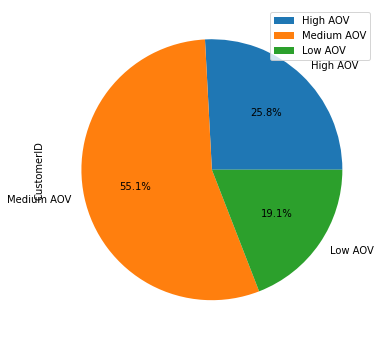

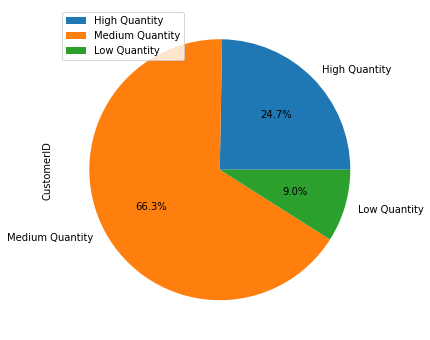

In [ ]:
quantity_plot = seg_results_aov.plot.pie(y='CustomerID', figsize=(6, 6), labels=['High AOV', 'Medium AOV', 'Low AOV'], autopct='%1.1f%%')
aov_plot = seg_results_quantity.plot.pie(y='CustomerID', figsize=(6, 6), labels=['High Quantity', 'Medium Quantity', 'Low Quantity'], autopct='%1.1f%%')